In [131]:
#@title Required Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.ticker import MaxNLocator

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats import norm, skew

In [107]:
#@title Upload and View Data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [108]:
#@title Explore Data

print(train_data.shape, train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## We notice that we are dealing with both quantitative and qualitative data parameters. We will establish how to evaluate both accoridingly. Starting with the quantitative data. Note: There is no need for the 'Id' column.


In [109]:
train_data.drop(['Id'], axis=1, inplace=True)
test_data.drop(['Id'], axis=1, inplace=True)

In [110]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-111-3c4915b800ca>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['SalePrice'], bins=50, color='r')


<Axes: xlabel='SalePrice', ylabel='Density'>

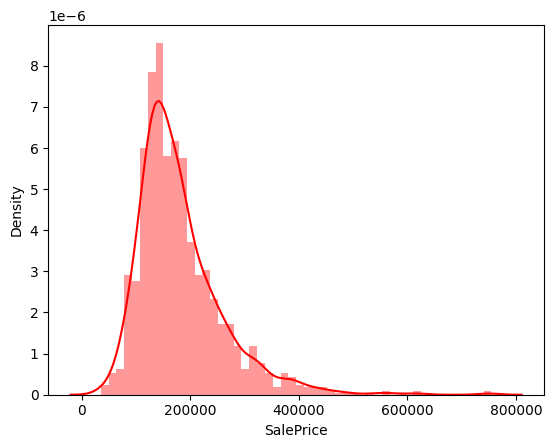

In [111]:
#@title The Distribution and Stats of the Desired Variable (Sale Price)

print(train_data['SalePrice'].describe())

sns.distplot(train_data['SalePrice'], bins=50, color='r')

In [112]:
print(list(set(train_data.dtypes))) # We find the exact breakdown of the datatypes in our table

train_data_numerical = train_data.select_dtypes(include=['int64', 'float64'])
train_data_categorical = train_data.select_dtypes(include=['object'])

[dtype('O'), dtype('int64'), dtype('float64')]


In [113]:
train_data_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [114]:
train_data_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [115]:
#@title Visualising Every Numerical Parameter's Distribution
print(f'{train_data_numerical.shape}\n{train_data_numerical.columns}\n{train_data_numerical.describe().T}')

(1460, 37)
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
                count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0      

<ipython-input-116-b6cc6d6a2051>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g.map(lambda _x, **kwargs: sns.distplot(_x, fit = norm), 'value')
<ipython-input-116-b6cc6d6a2051>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g.map(lambda _x, **kwargs: sns.distplot(_x, fit = norm), 'value')
<ipython-input-116-b6cc6d6

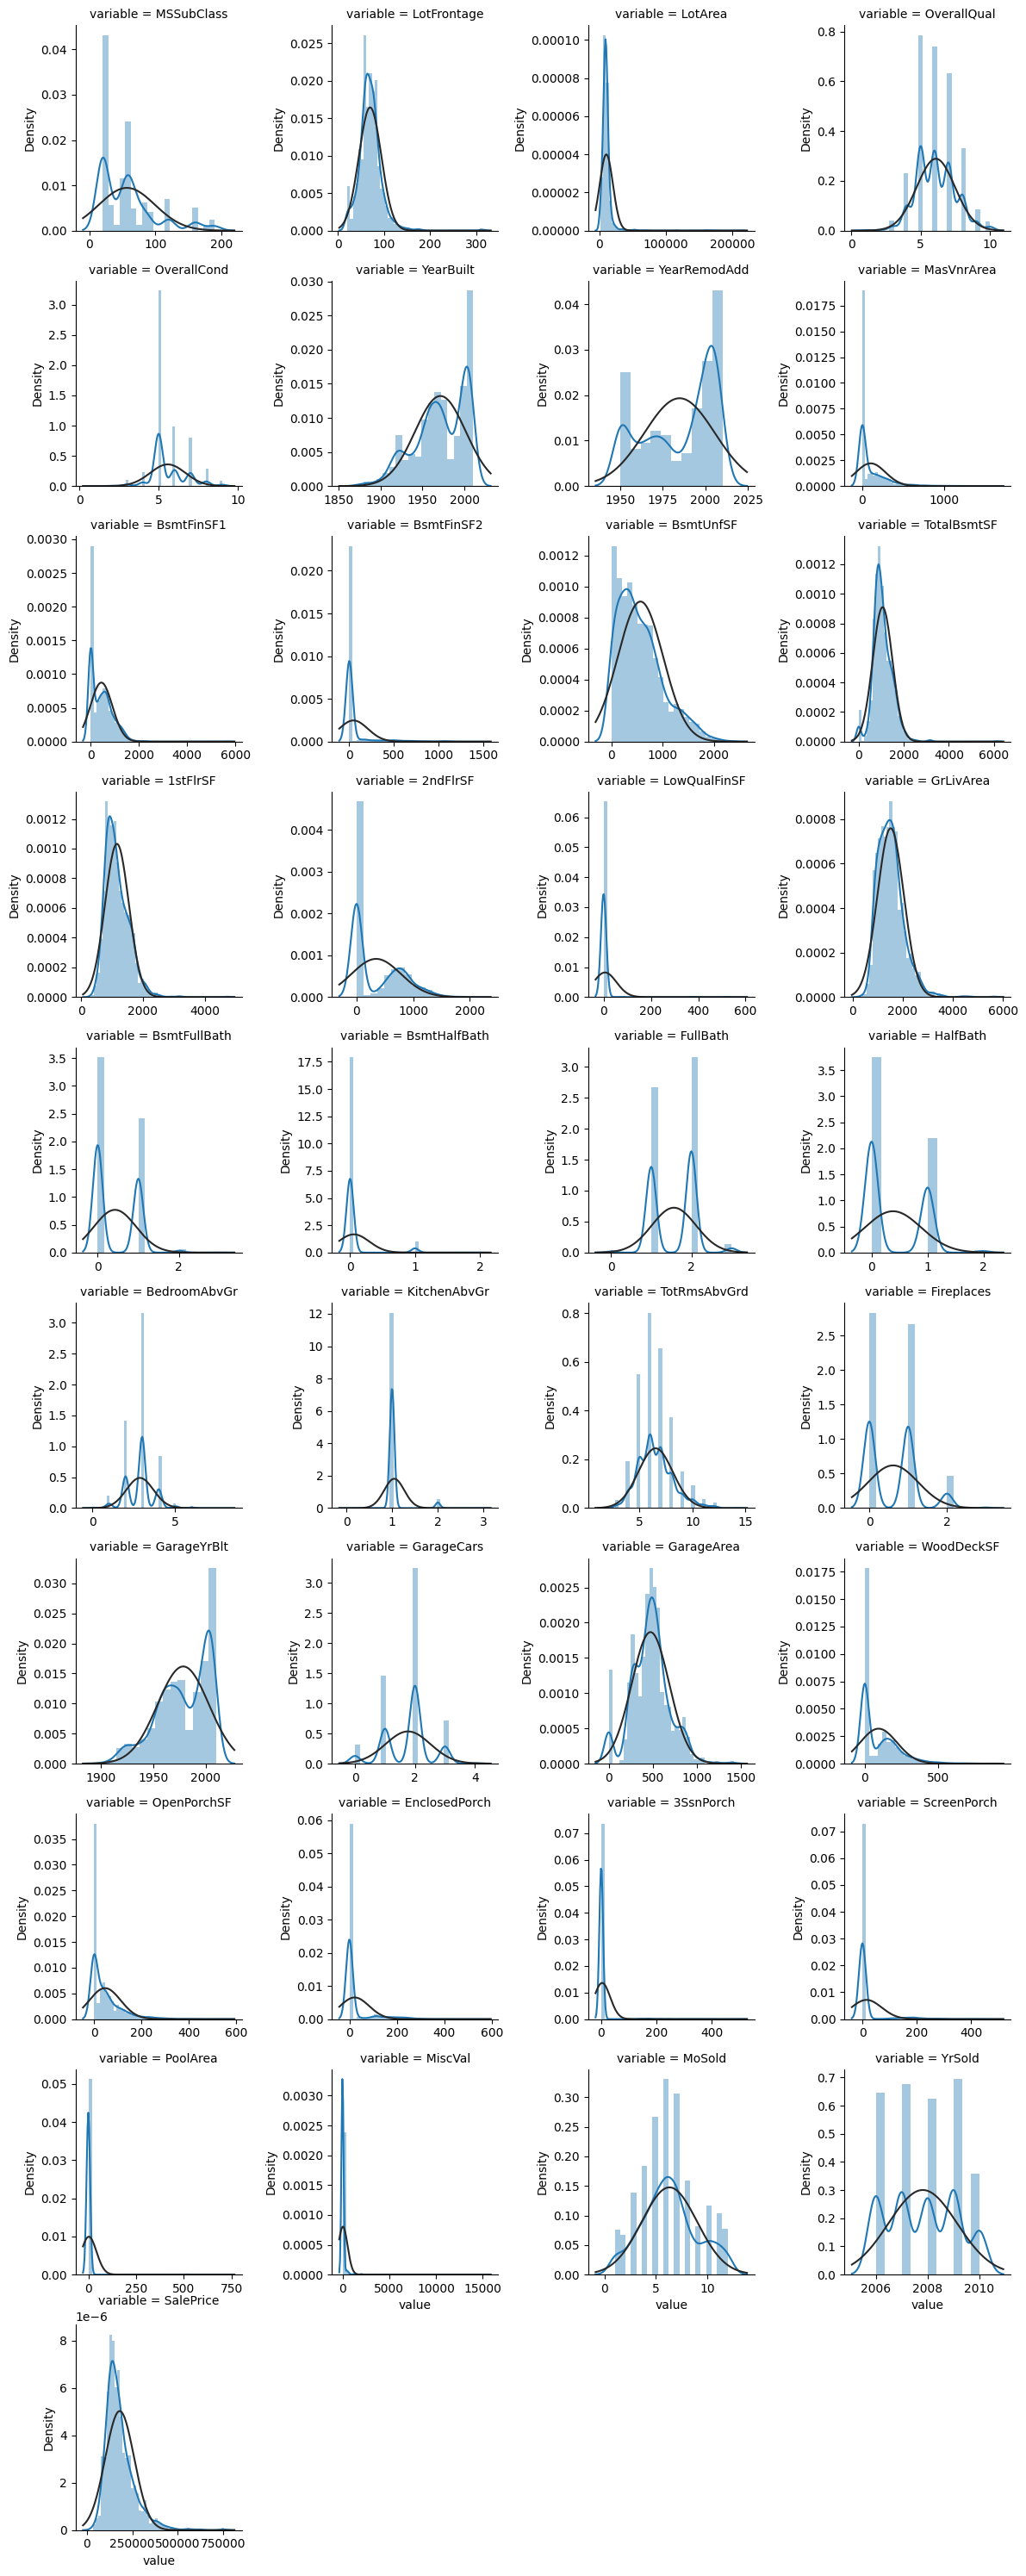

In [116]:
f = pd.melt(frame=train_data_numerical, value_vars=train_data_numerical)
g = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
g.map(lambda _x, **kwargs: sns.distplot(_x, fit = norm), 'value')

In [117]:
#@title Visualising Every Categorical Parameter's Distribution

print(f'{train_data_categorical.shape}\n{train_data_categorical.columns}\n{train_data_categorical.describe().T}')

(1460, 43)
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
              count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   I

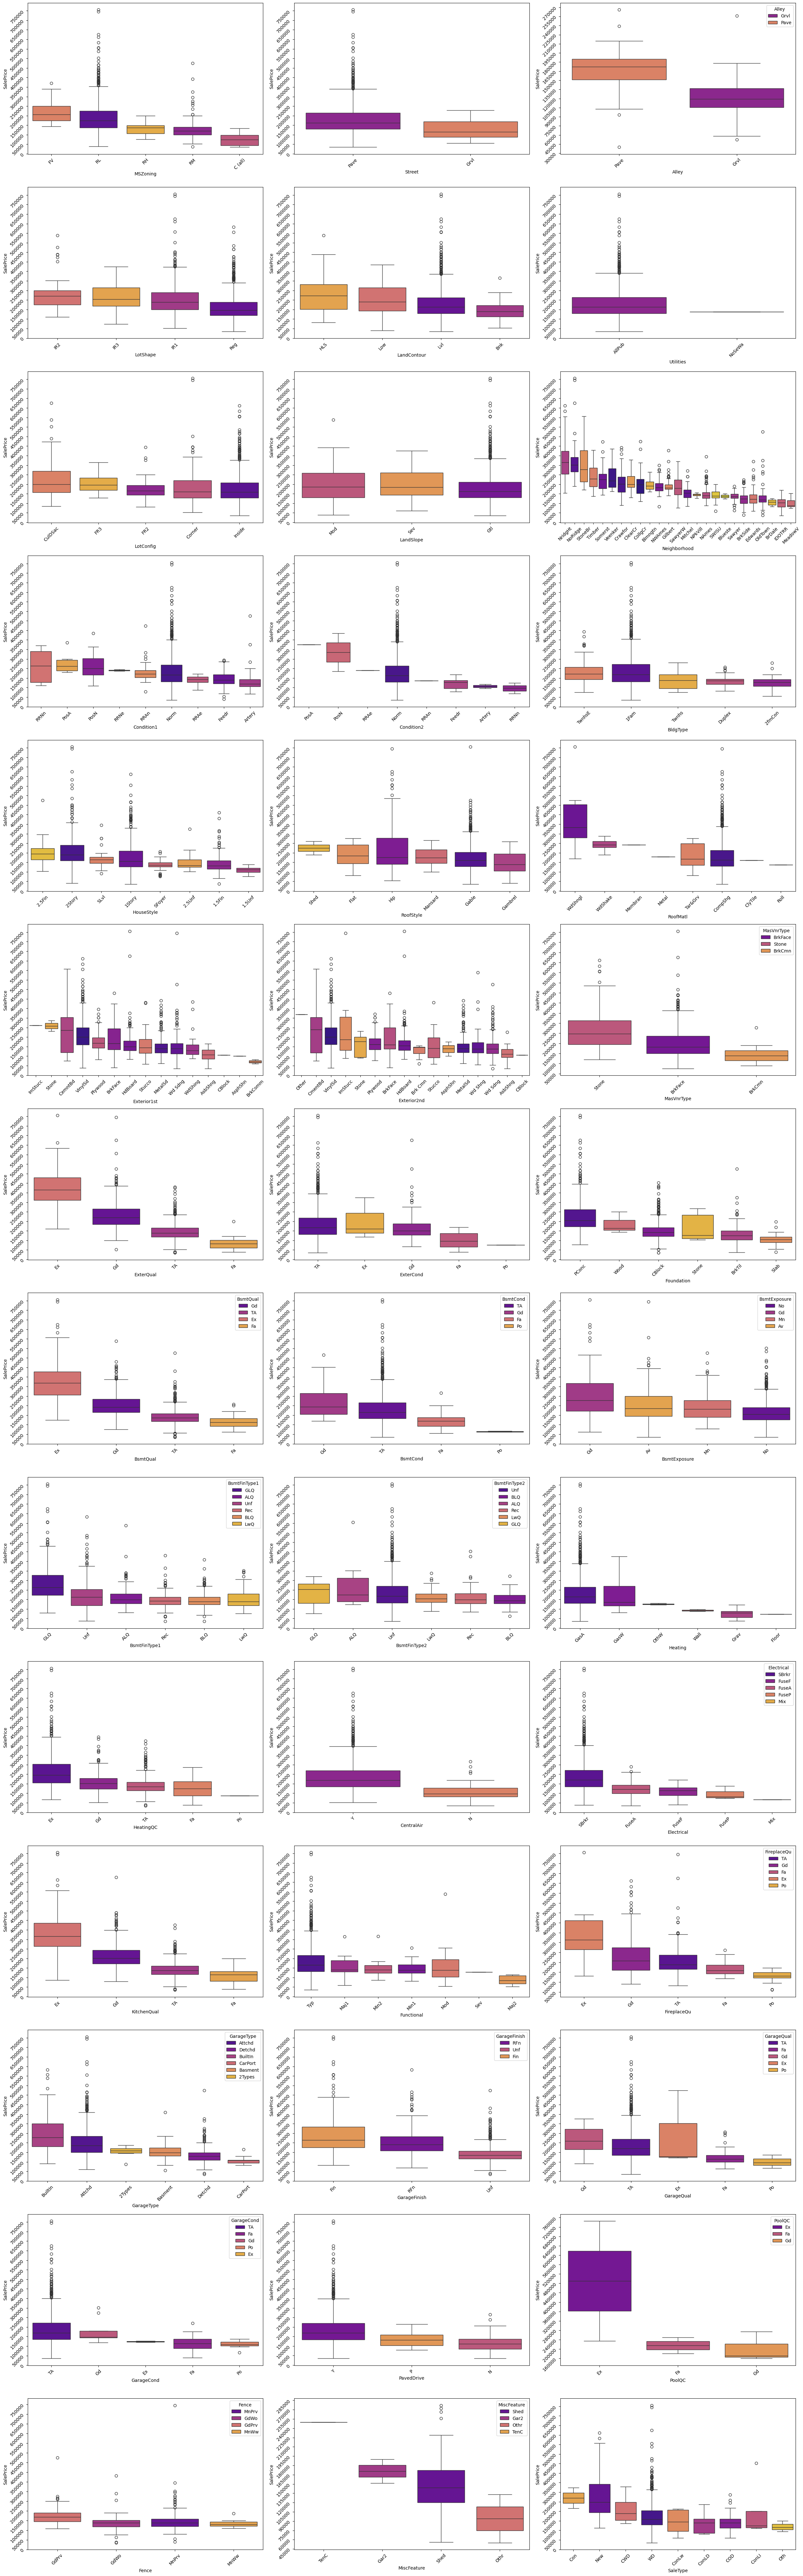

In [118]:
def srt_box(y, df):
    fig, axes = plt.subplots(14, 3, figsize=(25, 80))
    axes = axes.flatten()

    for i, j in zip(train_data_categorical[[col for col in train_data_categorical.columns]], axes):

        sortd = df.groupby([i])[y].median().sort_values(ascending=False)
        sns.boxplot(x=i,
                    y=y,
                    data=df,
                    hue=i,
                    palette='plasma',
                    order=sortd.index,
                    ax=j)
        j.tick_params(labelrotation=45)
        j.yaxis.set_major_locator(MaxNLocator(nbins=18))

        plt.tight_layout()

srt_box('SalePrice', train_data)

In [119]:
#@title Dealing with NaN/Missing Values

all_data=pd.concat([train_data,test_data])

print(all_data.shape)
all_data = all_data.reset_index(drop=True)
all_data.drop(['SalePrice'],axis=1,inplace=True)
print(all_data.shape)

(2919, 80)
(2919, 79)


In [120]:
nan_all_data = (all_data.isnull().sum())*100/all_data.shape[0]
nan_all_data= nan_all_data.drop(nan_all_data[nan_all_data== 0].index).sort_values(ascending=False)
nan_all_data
miss_df = pd.DataFrame({'Missing Ratio' :nan_all_data})
miss_df

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
MasVnrType,60.500171
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071


In [121]:
#delet features with very high number of missing values.
all_data.drop(['PoolQC','Alley','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True)

test_data.drop(['PoolQC','Alley','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True)
train_data.drop(['PoolQC','Alley','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True)

float64
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


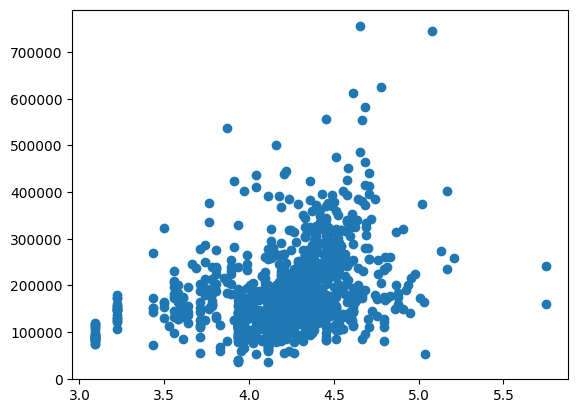

In [122]:
#Lot Frontage

print(train_data['LotFrontage'].dtype)
plt.scatter(x=np.log1p(train_data['LotFrontage']),y=train_data['SalePrice'])
print(train_data['LotFrontage'].describe())

## As Lot Frontage isn't missing too many vaues but has a decent correlation with Sale Price. So, we will just simply add mean values using the current values we have to fill in the missing ones.

In [123]:
all_data['LotFrontage'].fillna(np.mean(all_data['LotFrontage']),inplace=True)

In [124]:
# These features eg like garage qual, cond,finish, type seem to be important and relevant for buying a car.
# Fill them with the 'none' for categorical and 0 for numeric as nan here implies that there is no garage.


all_data['GarageYrBlt'].fillna(0,inplace=True)

all_data['GarageArea'].fillna(0,inplace=True)

all_data['GarageCars'].fillna(0,inplace=True)

all_data['GarageQual'].fillna('None',inplace=True)

all_data['GarageFinish'].fillna('None',inplace=True)

all_data['GarageCond'].fillna('None',inplace=True)

all_data['GarageType'].fillna('None',inplace=True)

In [125]:
# Basement related features. Missing values are likely zero for having no basement

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col].fillna(0,inplace=True)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col].fillna('None',inplace=True)

In [126]:
# MasVnrArea 0 and MasVnrType 'None'.


all_data['MasVnrArea'].fillna(0,inplace=True)

all_data['MasVnrType'].fillna('None',inplace=True)

In [127]:
# Other rem columns are all cat like kitchen qual etc.. and so filled with mode.

for col in ['MSZoning','Functional','SaleType','KitchenQual','Exterior2nd','Exterior1st','Electrical','Utilities']:
  all_data[col].fillna(all_data[col].mode()[0],inplace=True)

In [128]:
nan_all_data = (all_data.isnull().sum())*100/all_data.shape[0]
nan_all_data= nan_all_data.drop(nan_all_data[nan_all_data== 0].index).sort_values(ascending=False)
nan_all_data
miss_df = pd.DataFrame({'Missing Ratio' :nan_all_data})
miss_df

,Missing Ratio


## Sorted, no missing values :)

In [153]:
#@title Augmenting the Representation of Categorical Data to Perform Machine Learning (ML)

categortical_cols = all_data.select_dtypes(include='object').columns.tolist()
print(categortical_cols)

'''
    We use the OneHotEncoder to turn the categorical data into numerical by turning each possible category into a column
    and then from there if the feature is present it will be represented as a 1 and if not it will be a 0.
'''

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
one_hot_encoded = encoder.fit_transform(all_data[categortical_cols]) # List of new column names with one hot features

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categortical_cols)) # Creates a dataframe of only the one hot categories

df_encoded = pd.concat([all_data.drop(categortical_cols, axis=1), one_hot_df], axis=1)

df_encoded


['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2915,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2916,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2917,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [154]:
new_train_data = df_encoded.iloc[:train_data.shape[0]]
new_test_data = df_encoded.iloc[train_data.shape[0]:]

new_train_data = pd.concat([new_train_data, train_data['SalePrice']], axis=1)
print('There are', new_train_data['SalePrice'].isnull().sum(), 'missing values')



There are 0 missing values


In [155]:
new_train_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,250000


In [156]:
#@title Utilise Categorical Graphs to Identitfy Outliers to be Removed
def remove_outliers(df, column):

  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_no_outliers

print(f"Original shape: {new_train_data.shape}")
new_train_data = remove_outliers(new_train_data, 'SalePrice')
new_train_data = remove_outliers(new_train_data, 'LotFrontage')
new_train_data = remove_outliers(new_train_data, 'TotalBsmtSF')
new_train_data = remove_outliers(new_train_data, 'LotArea')
new_train_data = remove_outliers(new_train_data, 'GrLivArea')
new_train_data = remove_outliers(new_train_data, 'GarageArea')
print(f"Shape after outlier removal: {new_train_data.shape}")

Original shape: (1460, 280)
Shape after outlier removal: (1160, 280)


In [157]:
from sklearn.model_selection import train_test_split

y_data = new_train_data['SalePrice']
X_data = new_train_data.drop('SalePrice', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((928, 279), (232, 279))

In [158]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [160]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import math

In [161]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [162]:
print('LinearRegressio Train : ')
y_pred = lr.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
rmse = math.sqrt(mse)
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

LinearRegressio Train : 
MAE is 9247.100215517241
MSE is 169047385.88254312
R2 score is 0.9439652287595921
RMSE score is 13001.822406206875


In [163]:
print('LinearRegressio Test : ')
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

LinearRegressio Test : 
MAE is 22841477188050.215
MSE is 5.846033455532253e+28
R2 score is -1.6855761027650134e+19
RMSE score is 241785720329639.25


In [164]:
reg_lasso=Lasso()
reg_lasso.fit(X_train,y_train)

Lasso()

In [165]:
print('Lasso Train : ')
y_pred = reg_lasso.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
rmse = math.sqrt(mse)
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

Lasso Train : 
MAE is 9267.525122340989
MSE is 169163340.2220077
R2 score is 0.9439267929396454
RMSE score is 13006.280798983531


In [166]:
print('Lasso Test : ')
y_pred = reg_lasso.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

Lasso Test : 
MAE is 13405.582671663455
MSE is 348331894.6071907
R2 score is 0.8995661037784318
RMSE score is 18663.651695399556


In [167]:
reg_ridge=Ridge()
reg_ridge.fit(X_train,y_train)

Ridge()

In [168]:
print('Ridge Train : ')
y_pred = reg_ridge.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
rmse = math.sqrt(mse)
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

Ridge Train : 
MAE is 9479.872295130246
MSE is 174190321.49218243
R2 score is 0.9422604805974967
RMSE score is 13198.118104191311


In [169]:
print('Ridge Test : ')
y_pred = reg_ridge.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

Ridge Test : 
MAE is 13026.719937057058
MSE is 332242565.2522315
R2 score is 0.9042051105984442
RMSE score is 18227.522191790948
